# Life-Expectancy-Prediction

### author: Amin Rezaeeyan

# Table of Contents
1. [Problem Definition](#Problem-Definition)
2. [Importing Basic Libraries](#Importing-Basic-Libraries)
3. [Loading Dataset](#Loading-Dataset)
4. [EDA (Exploratory Data Analysis) and Feature Engineering](#Exploratory-Data-Analysis-and-Feature-Engineering)
5. [Model Training and Evaluation](#Model-Training-and-Evaluation)
6. [Conclusion](#Conclusion)

# Problem Definition

Life expectancy is a critical indicator of the overall health and well-being of a population. It is influenced by a wide range of factors, including socio-economic, environmental, and healthcare-related variables. Understanding these factors and their relationships with life expectancy can provide valuable insights for policymakers, public health officials, and researchers to improve health outcomes globally.

This project aims to leverage machine learning techniques to predict life expectancy based on the dataset provided by the World Health Organization (WHO). The dataset contains key features such as GDP, immunization rates, healthcare expenditures, and mortality rates, among others, for various countries over multiple years.

# Importing Basic Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Loading Dataset

[Life Expectancy (WHO) Dataset on Kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)

In [50]:
df = pd.read_csv('Life-Expectancy-Data.csv')

### Features:
The dataset includes the following key columns:

- **Country**: Name of the country.
- **Year**: Year of the data record.
- **Life expectancy**: Average life expectancy in years.
- **Adult Mortality**: Adult mortality rate per 1,000 population (ages 15-60).
- **Infant Deaths**: Number of infant deaths per 1,000 live births.
- **Alcohol**: Per capita alcohol consumption (liters of pure alcohol).
- **Percentage Expenditure**: Health expenditure as a percentage of GDP.
- **Hepatitis B**: Percentage of children immunized against Hepatitis B.
- **Measles**: Number of reported measles cases per 1,000 population.
- **BMI**: Average Body Mass Index of the population.
- **Under-Five Deaths**: Number of under-five deaths per 1,000 live births.
- **Polio**: Percentage of children immunized against Polio.
- **Total Expenditure**: Total health expenditure as a percentage of GDP.
- **Diphtheria**: Percentage of children immunized against Diphtheria.
- **HIV/AIDS**: Deaths per 1,000 live births due to HIV/AIDS.
- **GDP**: Gross Domestic Product per capita (USD).
- **Population**: Total population of the country.
- **Schooling**: Average number of years of schooling.

# Exploratory Data Analysis and Feature Engineering

### Data Summary

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [52]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [53]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [54]:
len(df['Country'].unique())

193

The goal is to build a model that predicts life expectancy for every country. Including the "country" feature would make the model specific to the countries in the training data, limiting its ability to generalize to new or unseen countries.

Other features in the dataset (e.g., GDP, healthcare expenditure, education, etc.) are expected to capture the underlying factors that influence life expectancy, making the "country" feature redundant.

Removing the "country" feature simplifies the model and avoids issues related to high cardinality (184 unique values), such as increased dimensionality or overfitting.

In [55]:
df = df.drop(columns=['Country'])

### Handling Column Name Errors

Some column names in the dataset have leading or trailing spaces, which can cause issues when accessing the columns. For example, the column name 'Life expectancy ' has a trailing space, and other column names may have similar problems. These discrepancies can lead to errors when trying to access or modify the data.

In [56]:
# Strip leading and trailing spaces from all column names
df.columns = df.columns.str.strip()

# Verifying the column names after cleaning
print(df.columns)

Index(['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


### Checking And Removing Duplicates

In [57]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicate rows (if any)
df = df.drop_duplicates()
print(f"Shape of dataframe after removing duplicates: {df.shape}")

Number of duplicate rows: 0
Shape of dataframe after removing duplicates: (2938, 21)


### Handling Missing Values

In [58]:
missing_values = df.isnull().sum()
print(missing_values)

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


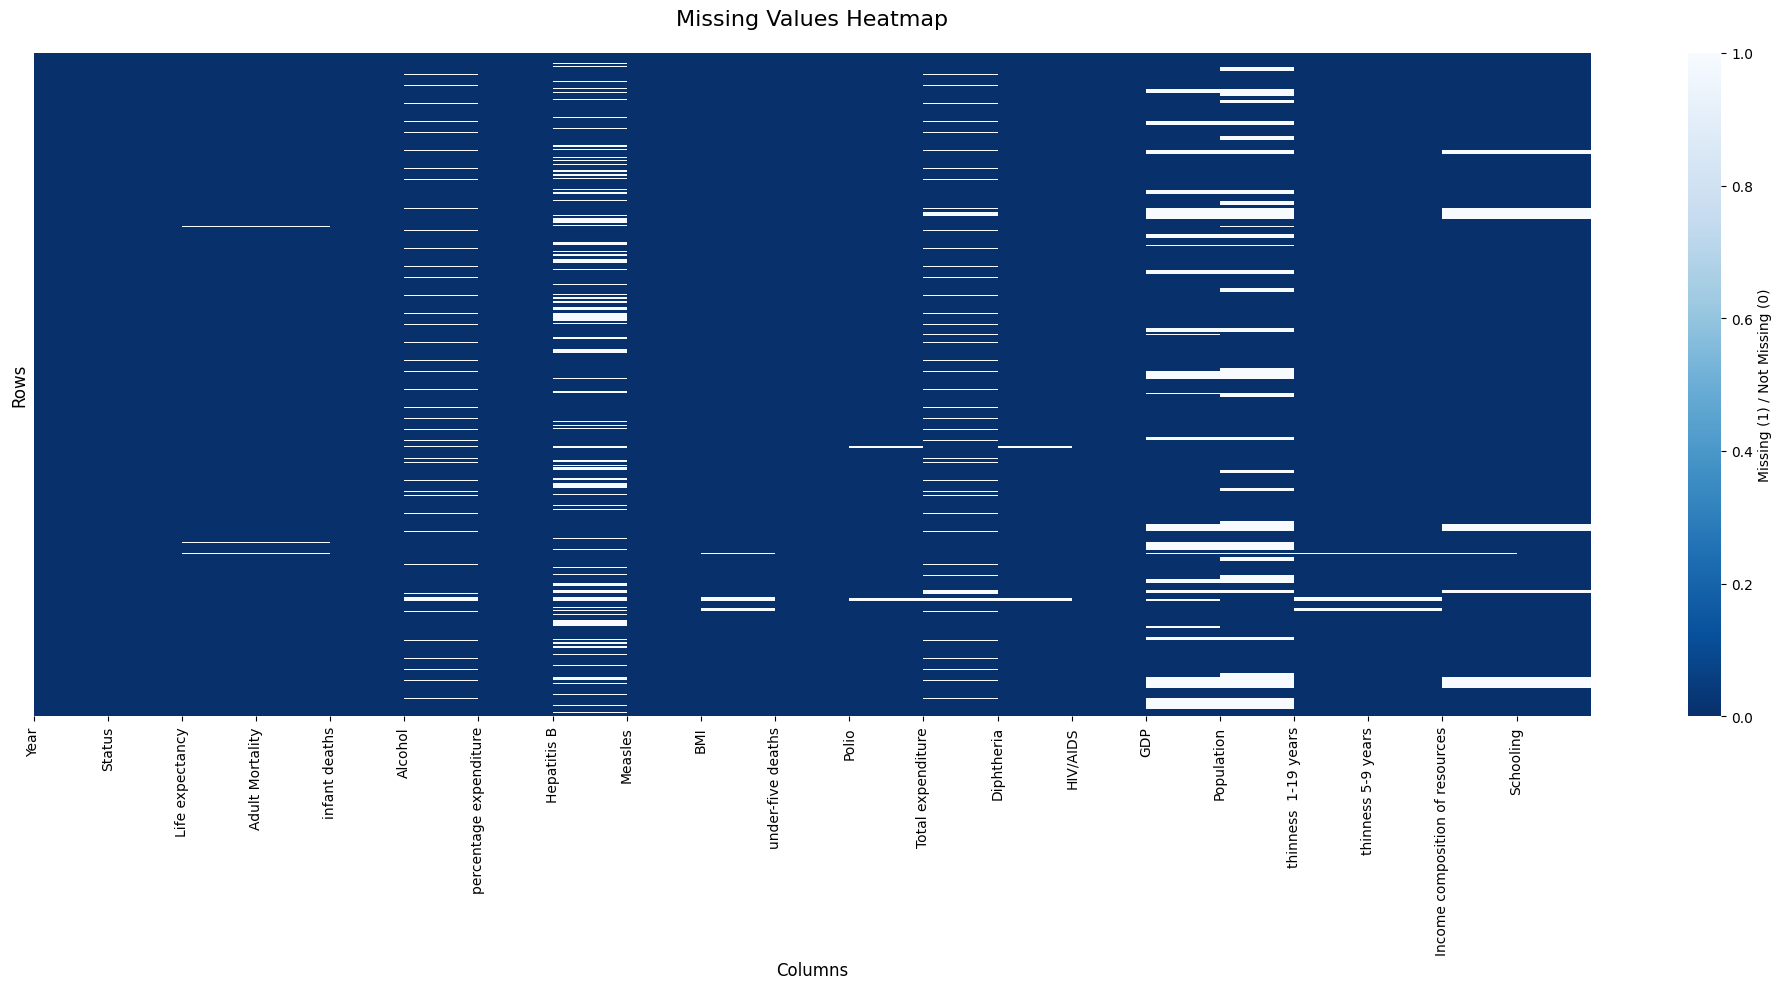

In [59]:
missing_matrix = df.isnull().astype(int)

plt.figure(figsize=(20, 10))

sns.heatmap(
    missing_matrix, 
    cmap='Blues_r',
    cbar_kws={'label': 'Missing (1) / Not Missing (0)'},
    yticklabels=False
)


plt.title("Missing Values Heatmap", fontsize=16, pad=20)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)
plt.xticks(range(len(df.columns)), df.columns, rotation=90, fontsize=10)

plt.tight_layout()
plt.show()

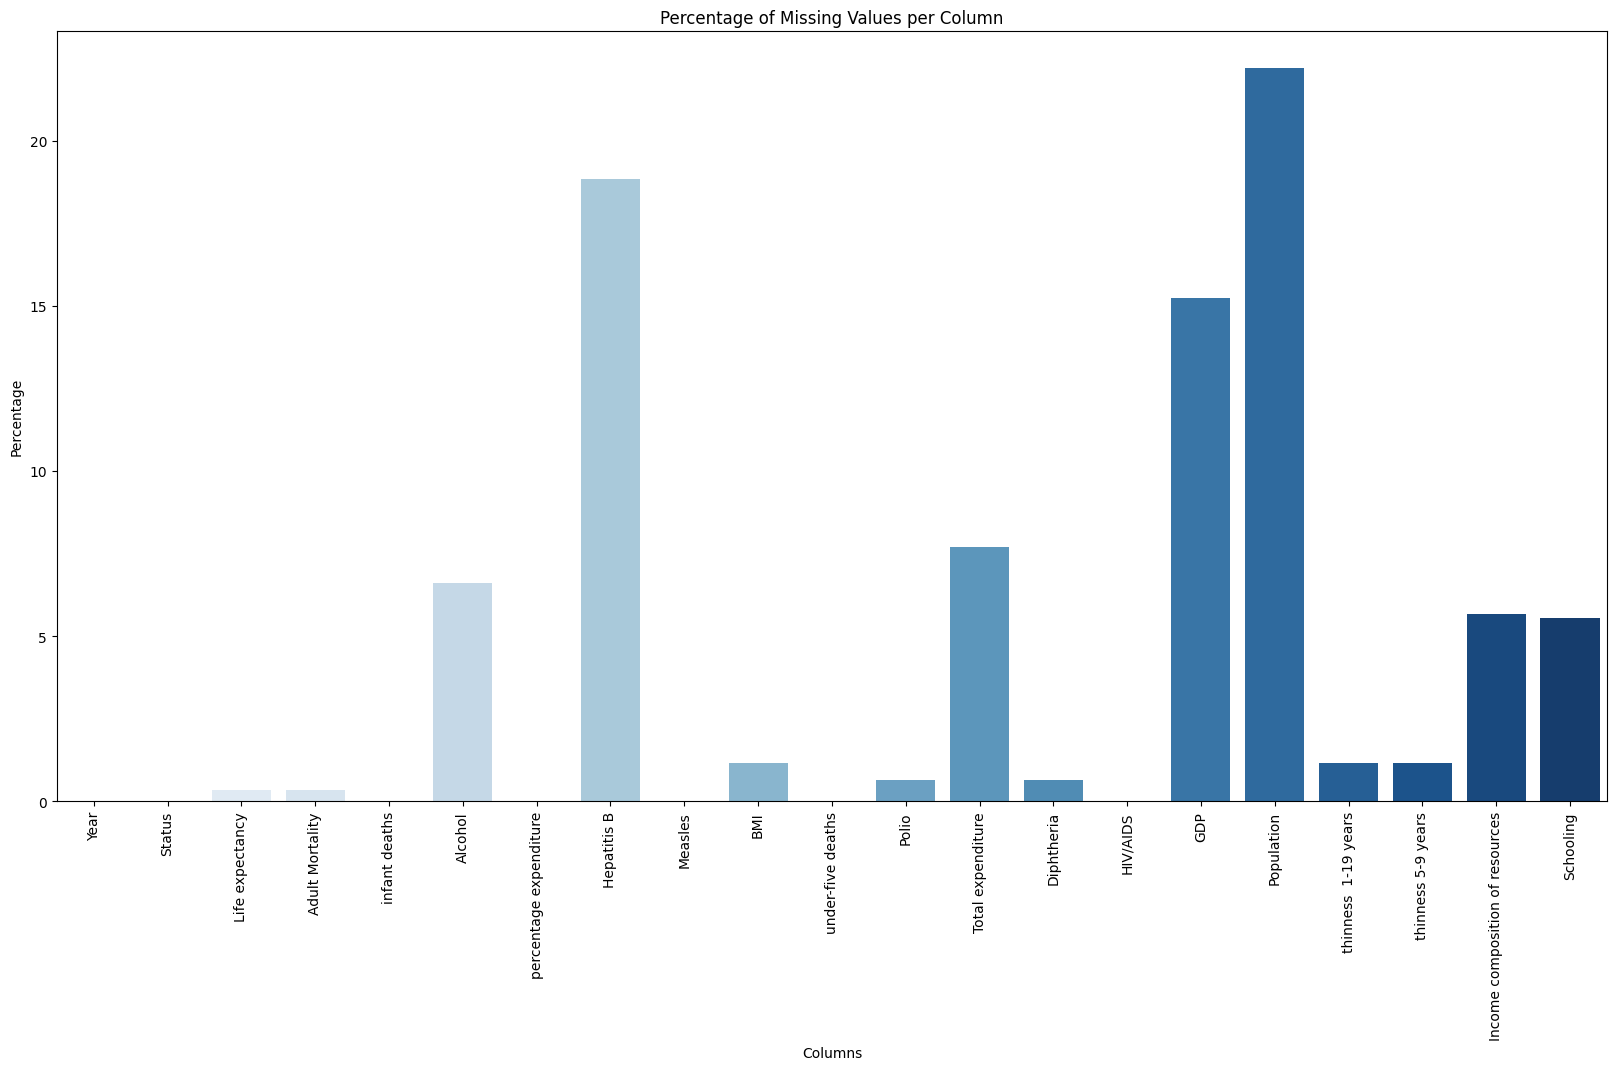

In [60]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

plt.figure(figsize=(20, 10))
sns.barplot(x=missing_percentage.index, y=missing_percentage, hue=missing_percentage.index, palette='Blues', legend=False)
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.xticks(rotation=90)
plt.show()

<Axes: >

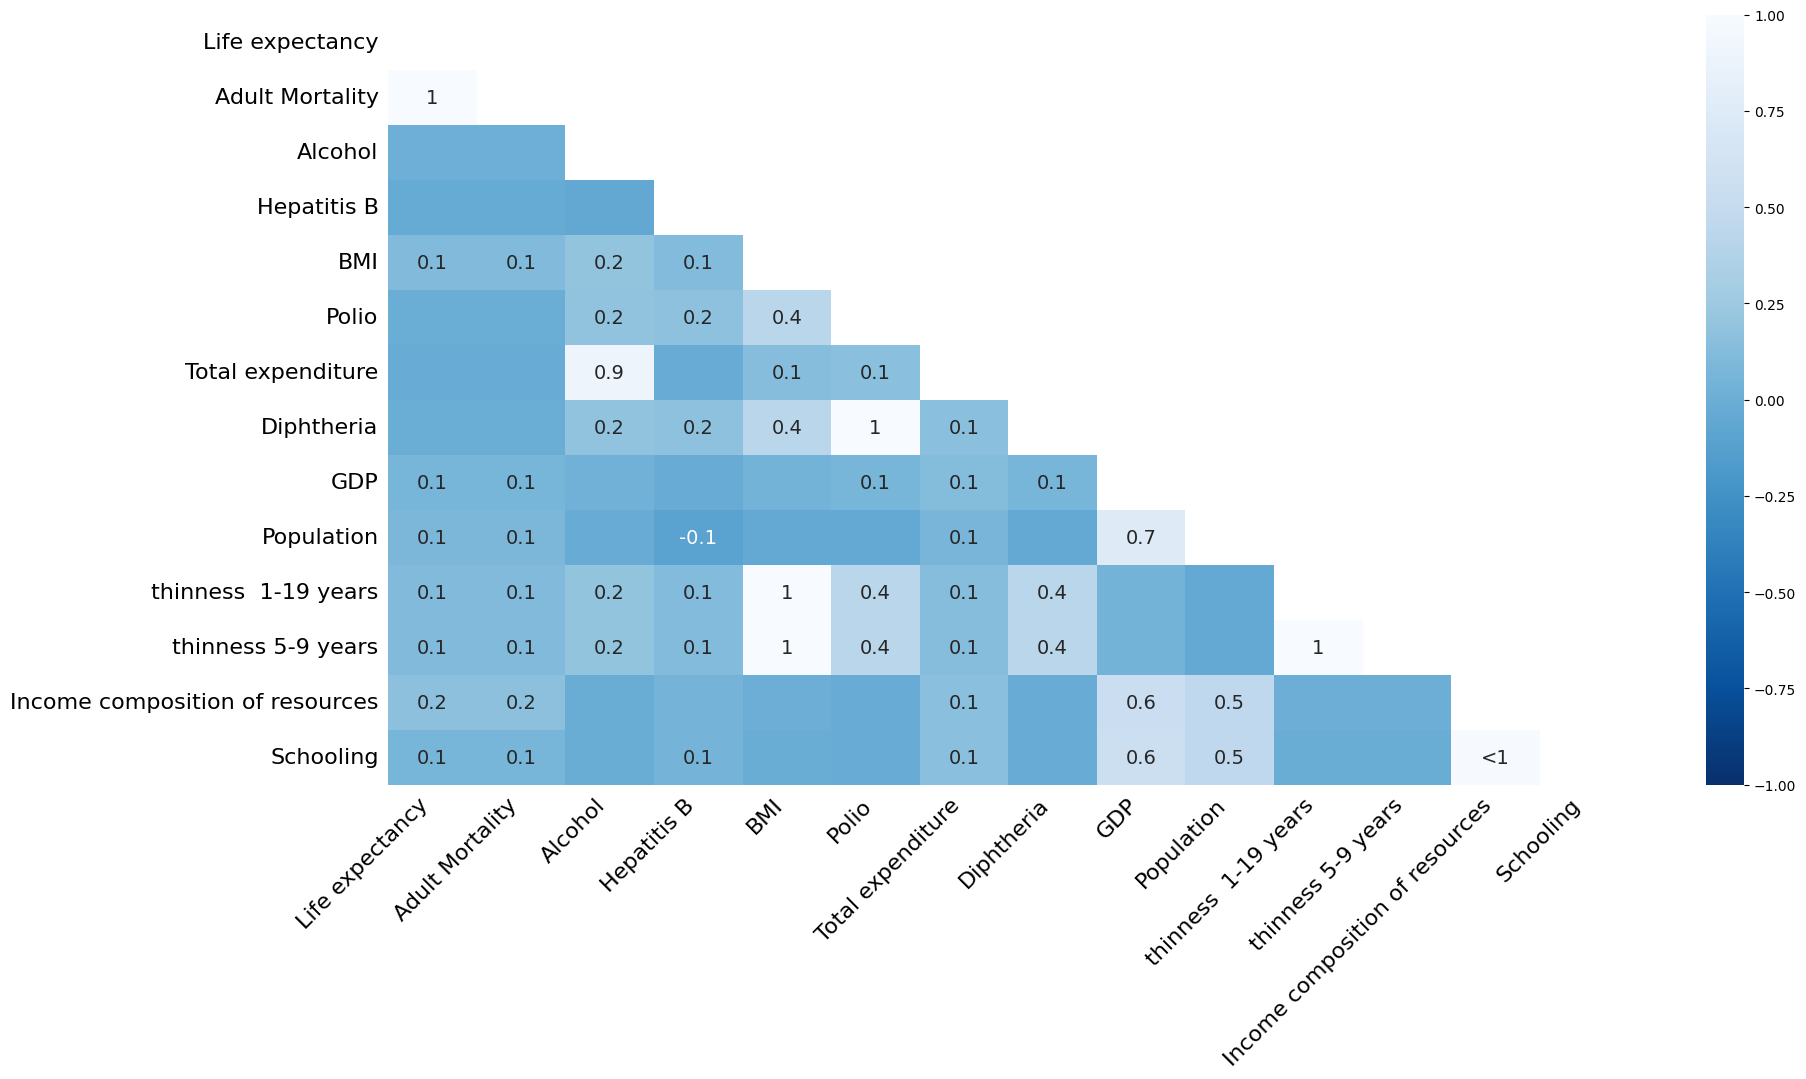

In [61]:
import missingno as msno
msno.heatmap(df, figsize=(20,10), fontsize=16, cmap='Blues_r')

The dataset was analyzed to determine whether the missing data is **Missing at Random (MAR)** or **Missing Completely at Random (MCAR)**. Based on the relationships observed between the missingness of each column and other variables in the dataset:

#### MAR (Missing at Random):

Columns where the missingness shows a strong relationship (correlation > 0.5) with at least one other observed variable are classified as MAR. For these variables, the missingness can be explained by the patterns in other observed data.
Columns classified as MAR:

Life expectancy (10 missing values)
Adult Mortality (10 missing values)
Alcohol (194 missing values)
BMI (34 missing values)
Polio (19 missing values)
Total expenditure (226 missing values)
Diphtheria (19 missing values)
GDP (448 missing values)
Population (652 missing values)
Thinness 1-19 years (34 missing values)
Thinness 5-9 years (34 missing values)
Income composition of resources (167 missing values)
Schooling (163 missing values)

#### MCAR (Missing Completely at Random):

Columns where the missingness does not show any strong relationship (correlation ≤ 0.5) with other observed variables are classified as MCAR. In these cases, the missingness does not depend on any other observed or unobserved data in the dataset.
Columns classified as MCAR:

Hepatitis B (553 missing values)

Since MCAR features have missingness that is completely random and does not depend on any observed or unobserved data, handling them is relatively easy. Simple imputation strategies like mean, median, or mode are often sufficient for MCAR features.

In [62]:
mcar_columns = ['Hepatitis B']

mean_imputer = SimpleImputer(strategy='mean')

df[mcar_columns] = mean_imputer.fit_transform(df[mcar_columns])

print("Missing values after imputation of MCAR columns:")
print(df.isnull().sum())

Missing values after imputation of MCAR columns:
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


 **MICE** is a powerful and flexible method for imputing MAR missing values, but it requires categorical variables to be labeled (encoded) first.

In [63]:
df = pd.get_dummies(df, columns=['Status'], drop_first=True)

In [64]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mar_columns = [
    'Life expectancy', 'Adult Mortality', 'Alcohol', 'BMI', 'Polio',
    'Total expenditure', 'Diphtheria', 'GDP', 'Population',
    'thinness  1-19 years', 'thinness 5-9 years',
    'Income composition of resources', 'Schooling'
]

mice_imputer = IterativeImputer(
    max_iter=10,
    random_state=42,
    initial_strategy='mean'
)

df[mar_columns] = mice_imputer.fit_transform(df[mar_columns])

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
Status_Developing                  0
dtype: int64


### Detecting and Handling Outliers

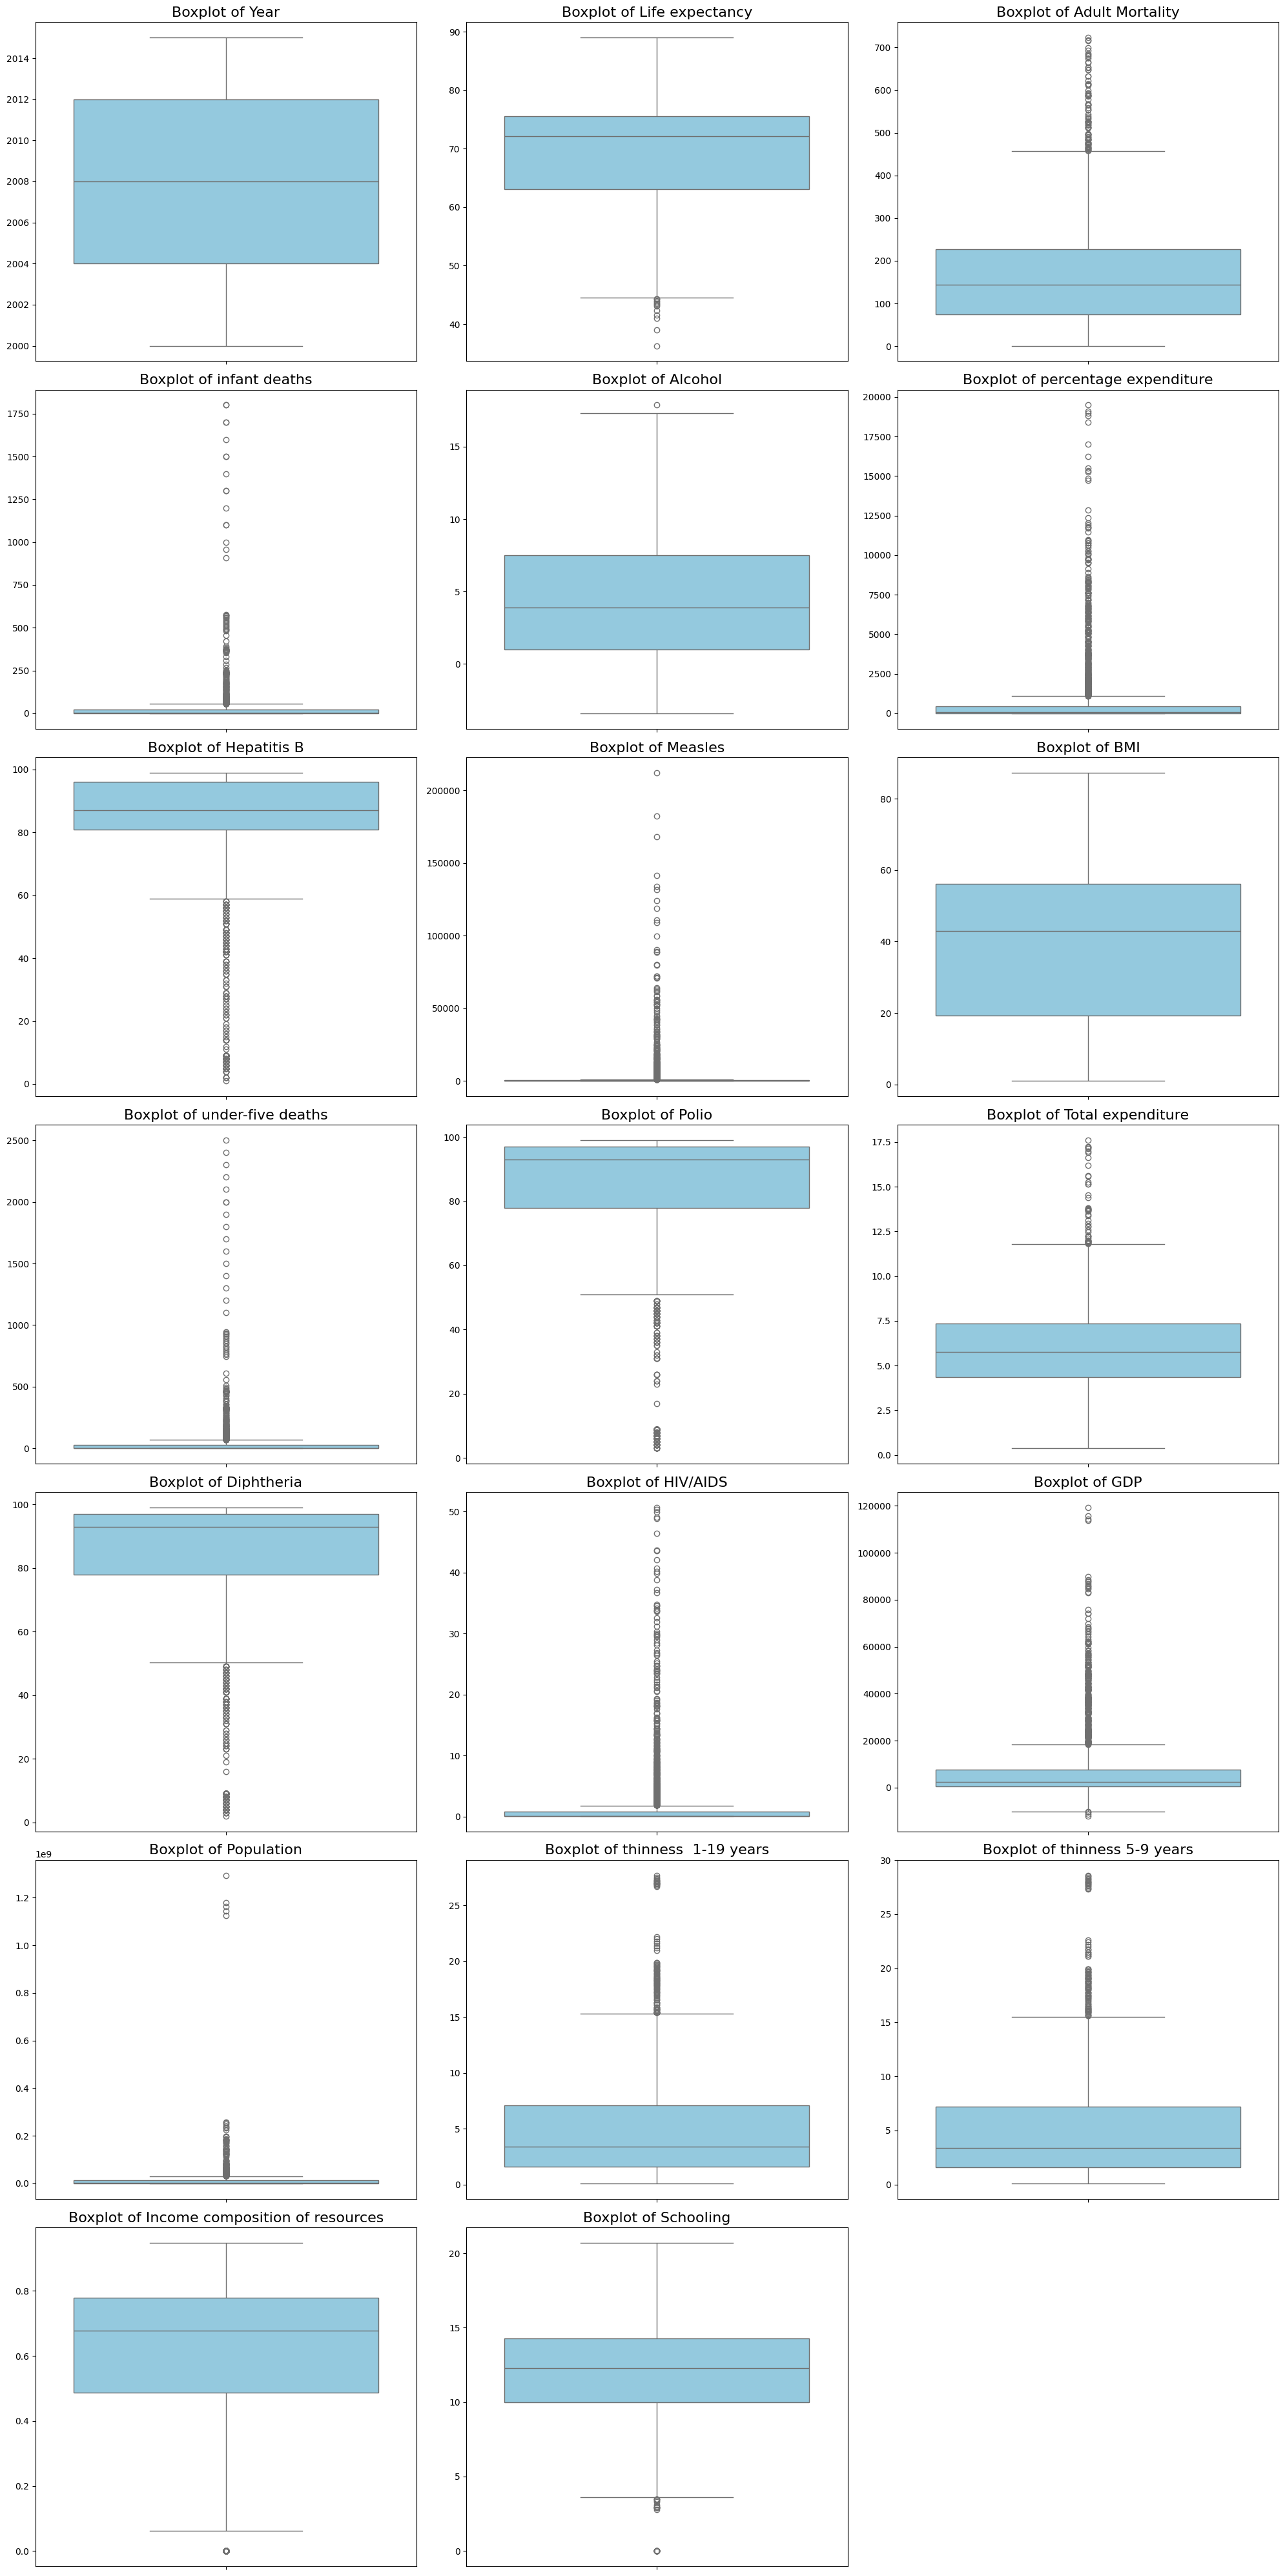

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Automatically identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(20, 40))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) // 3) + 1, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=16)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [66]:
from scipy.stats import zscore

def detect_outliers_zscore(column, threshold=3):
    z_scores = zscore(column)
    outliers = column[np.abs(z_scores) > threshold]
    return outliers

outlier_counts = {}
for column in numerical_columns:
    outliers = detect_outliers_zscore(df[column])
    outlier_counts[column] = len(outliers)
    print(f"Number of outliers in {column}: {len(outliers)}")

for column, count in outlier_counts.items():
    if count > 0:
        print(f"Outliers in {column}: {detect_outliers_zscore(df[column]).values}")

Number of outliers in Year: 0
Number of outliers in Life expectancy: 2
Number of outliers in Adult Mortality: 40
Number of outliers in infant deaths: 37
Number of outliers in Alcohol: 4
Number of outliers in percentage expenditure: 84
Number of outliers in Hepatitis B: 161
Number of outliers in Measles: 48
Number of outliers in BMI: 0
Number of outliers in under-five deaths: 34
Number of outliers in Polio: 172
Number of outliers in Total expenditure: 26
Number of outliers in Diphtheria: 170
Number of outliers in HIV/AIDS: 69
Number of outliers in GDP: 87
Number of outliers in Population: 24
Number of outliers in thinness  1-19 years: 54
Number of outliers in thinness 5-9 years: 57
Number of outliers in Income composition of resources: 0
Number of outliers in Schooling: 28
Outliers in Life expectancy: [36.3 39. ]
Outliers in Adult Mortality: [566. 652. 693. 699. 679. 647. 593. 682. 566. 592. 633. 654. 675. 666.
 648. 622. 586. 543. 559. 587. 615. 613. 599. 588. 564. 587. 568. 539.
 554.

Outliers were detected using the **Z-score method**. The Z-score measures how many standard deviations a data point is from the mean. Any data point with an absolute Z-score greater than a specified threshold (commonly 3) is considered an outlier.

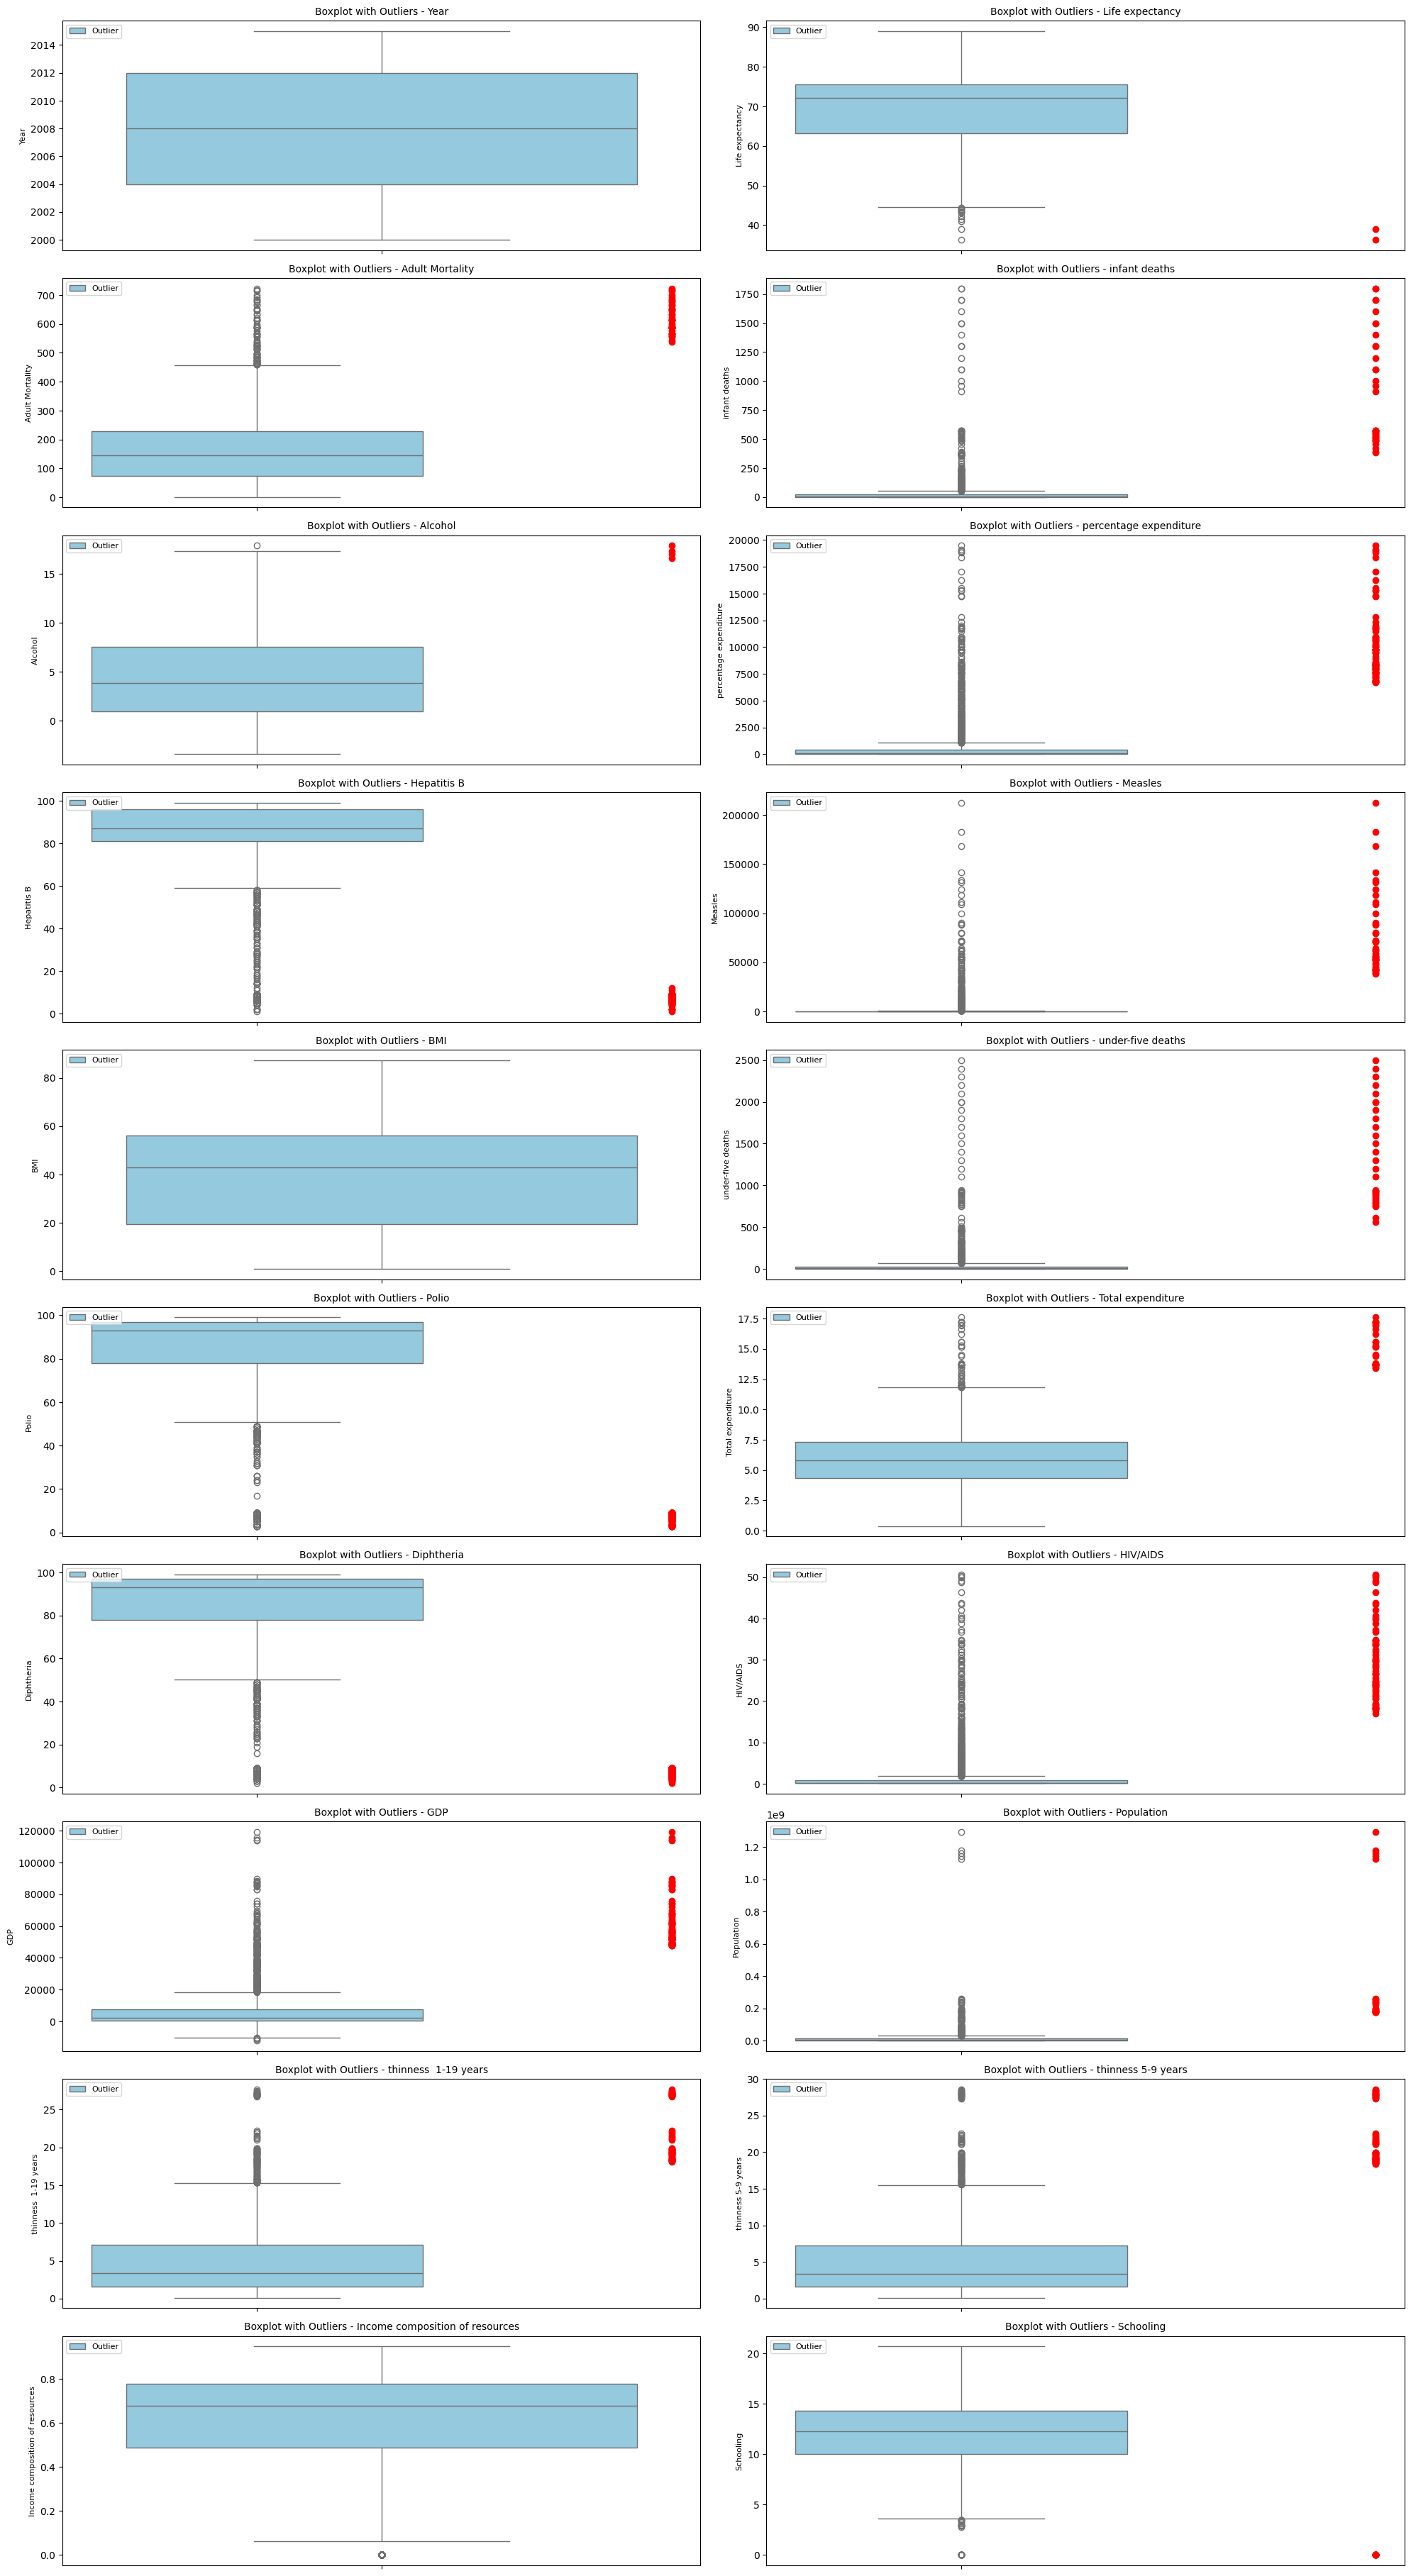

In [67]:
plt.figure(figsize=(20, 40))

for i, column in enumerate(numerical_columns, 1):
    outliers = detect_outliers_zscore(df[column])
    plt.subplot((len(numerical_columns) // 2) + 1, 2, i)
    sns.boxplot(y=df[column], color='skyblue')
    
    # Highlight outliers
    if not outliers.empty:
        for outlier in outliers:
            plt.scatter(1, outlier, color='red', label='Outlier')
    
    plt.title(f'Boxplot with Outliers - {column}', fontsize=10)
    plt.ylabel(column, fontsize=8)
    plt.xlabel('')
    plt.legend(['Outlier'], loc='upper left', fontsize=8, markerscale=0.7)

plt.tight_layout()
plt.show()

 While these outliers deviate significantly from the majority of the data, they were retained in the dataset as they carry meaningful information. Removing them could lead to a loss of potentially valuable insights, especially in cases where these data points represent rare but valid occurrences.

However, upon further analysis, it was determined that certain data points indicating an input composition of resources of zero are impossible and likely due to errors in data collection or processing.

In [68]:
df = df[df["Income composition of resources"] != 0]

### Analyzing the Distribution of Features

In [69]:
features = df.drop('Life expectancy', axis=1)
target = df['Life expectancy']

numerical_features = features.select_dtypes(include=['number'])
categorical_features = features.select_dtypes(exclude=['number'])

#### Numerical Features

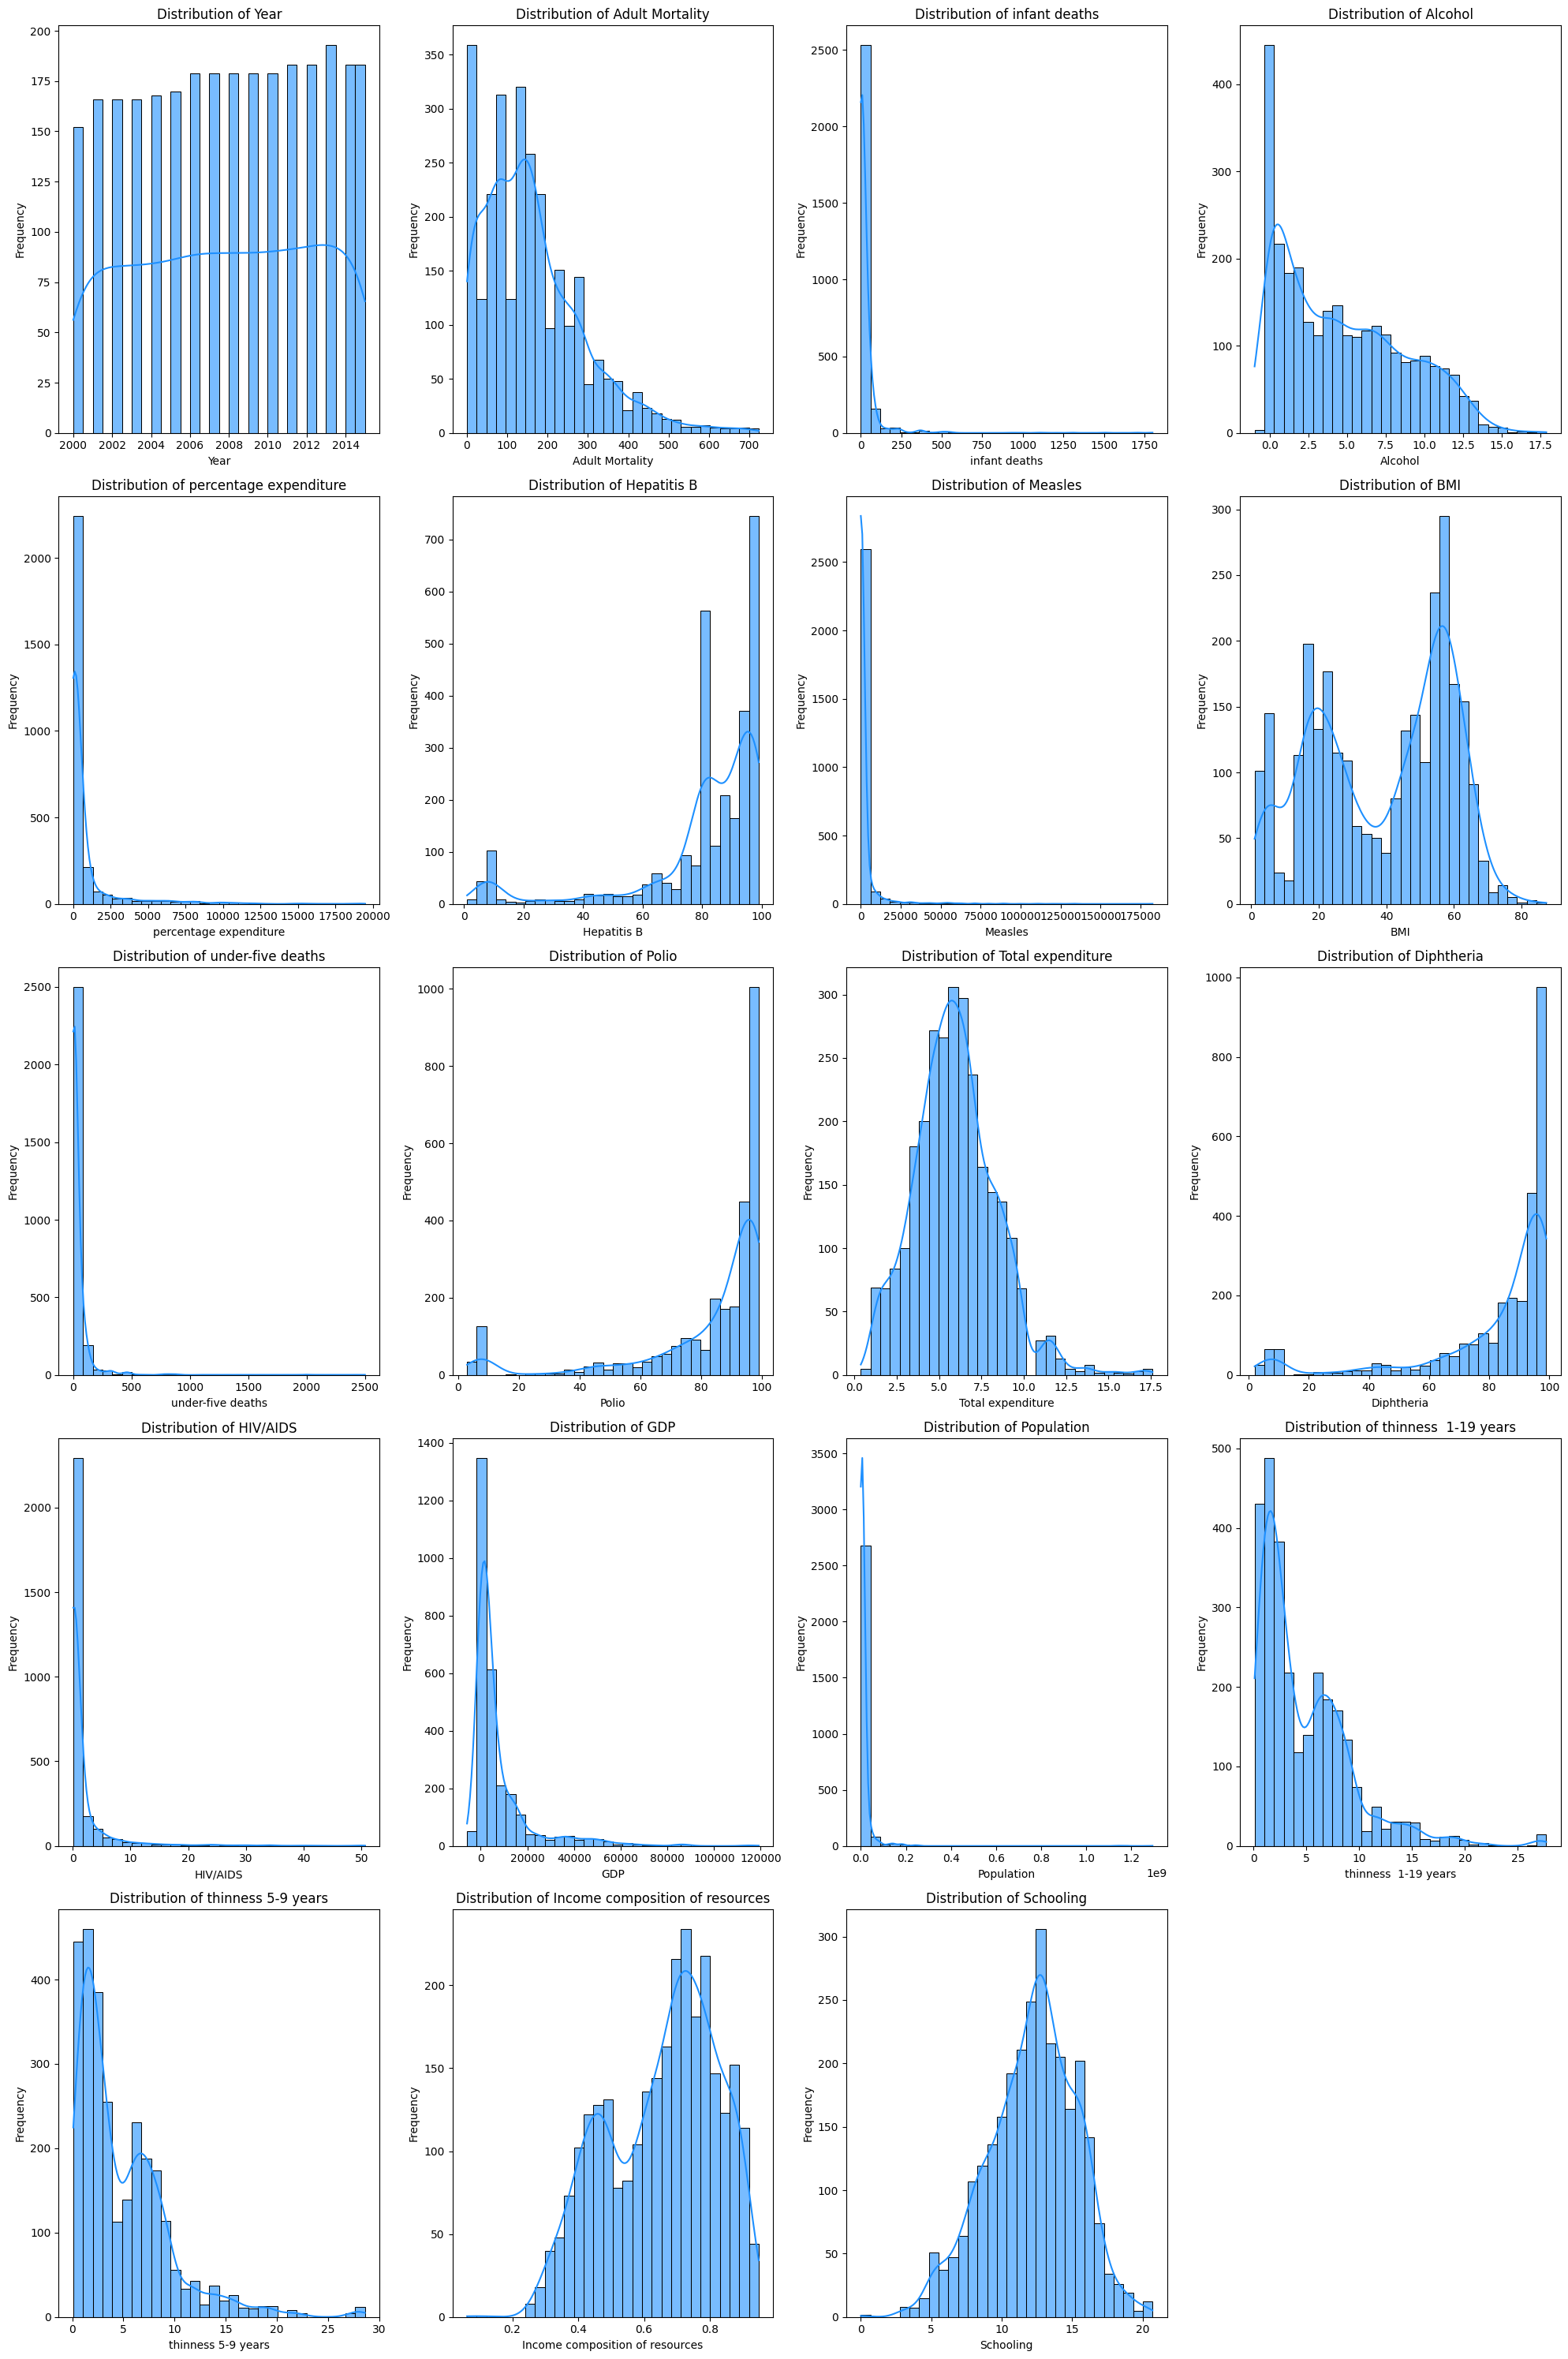

In [70]:
plt.figure(figsize=(20, 30))
for i, column in enumerate(numerical_features.columns, 1):
    plt.subplot(5, 4, i)
    
    sns.histplot(data=df, x=column, kde=True, bins=30, color='dodgerblue', alpha=0.6)
    
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

In [71]:
# Check skewness for each feature
skewness = numerical_features.skew()
print("Skewness of Features:")
print(skewness)

Skewness of Features:
Year                               -0.058900
Adult Mortality                     1.217998
infant deaths                       9.906658
Alcohol                             0.557702
percentage expenditure              4.542142
Hepatitis B                        -2.124986
Measles                             8.506961
BMI                                -0.225639
under-five deaths                   9.716083
Polio                              -2.129911
Total expenditure                   0.643710
Diphtheria                         -2.120755
HIV/AIDS                            5.301124
GDP                                 3.226246
Population                         17.750846
thinness  1-19 years                1.736673
thinness 5-9 years                  1.798084
Income composition of resources    -0.383651
Schooling                          -0.302123
dtype: float64


We should transfrom the heavily skewed features

The **Yeo-Johnson transformation** is a method used to stabilize variance and make data more Gaussian-like, which is particularly useful when features exhibit significant skewness. This transformation can handle both positive and negative values.

In [72]:
from sklearn.preprocessing import PowerTransformer

df_transformed = df.copy()

# Features that need transformation (considering both positive and negative skewness)
all_features_to_transform = [
    'infant deaths', 'under-five deaths', 'Measles', 'HIV/AIDS',
    'percentage expenditure', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years',
    'Hepatitis B', 'Polio', 'Diphtheria', 'Income composition of resources'
]

# Apply Yeo-Johnson transformation for features with both positive and negative values
power_transformer = PowerTransformer(method='yeo-johnson')

df_transformed[all_features_to_transform] = power_transformer.fit_transform(df[all_features_to_transform])

transformed_skewness = df_transformed[all_features_to_transform].skew()
print("Transformed Skewness of Features After Yeo-Johnson:")
print(transformed_skewness)

Transformed Skewness of Features After Yeo-Johnson:
infant deaths                      0.167503
under-five deaths                  0.159740
Measles                            0.170973
HIV/AIDS                           0.982317
percentage expenditure            -0.016363
GDP                                1.629862
Population                        -0.043602
thinness  1-19 years               0.019213
thinness 5-9 years                 0.013548
Hepatitis B                       -0.894635
Polio                             -1.028105
Diphtheria                        -1.038930
Income composition of resources   -0.099101
dtype: float64


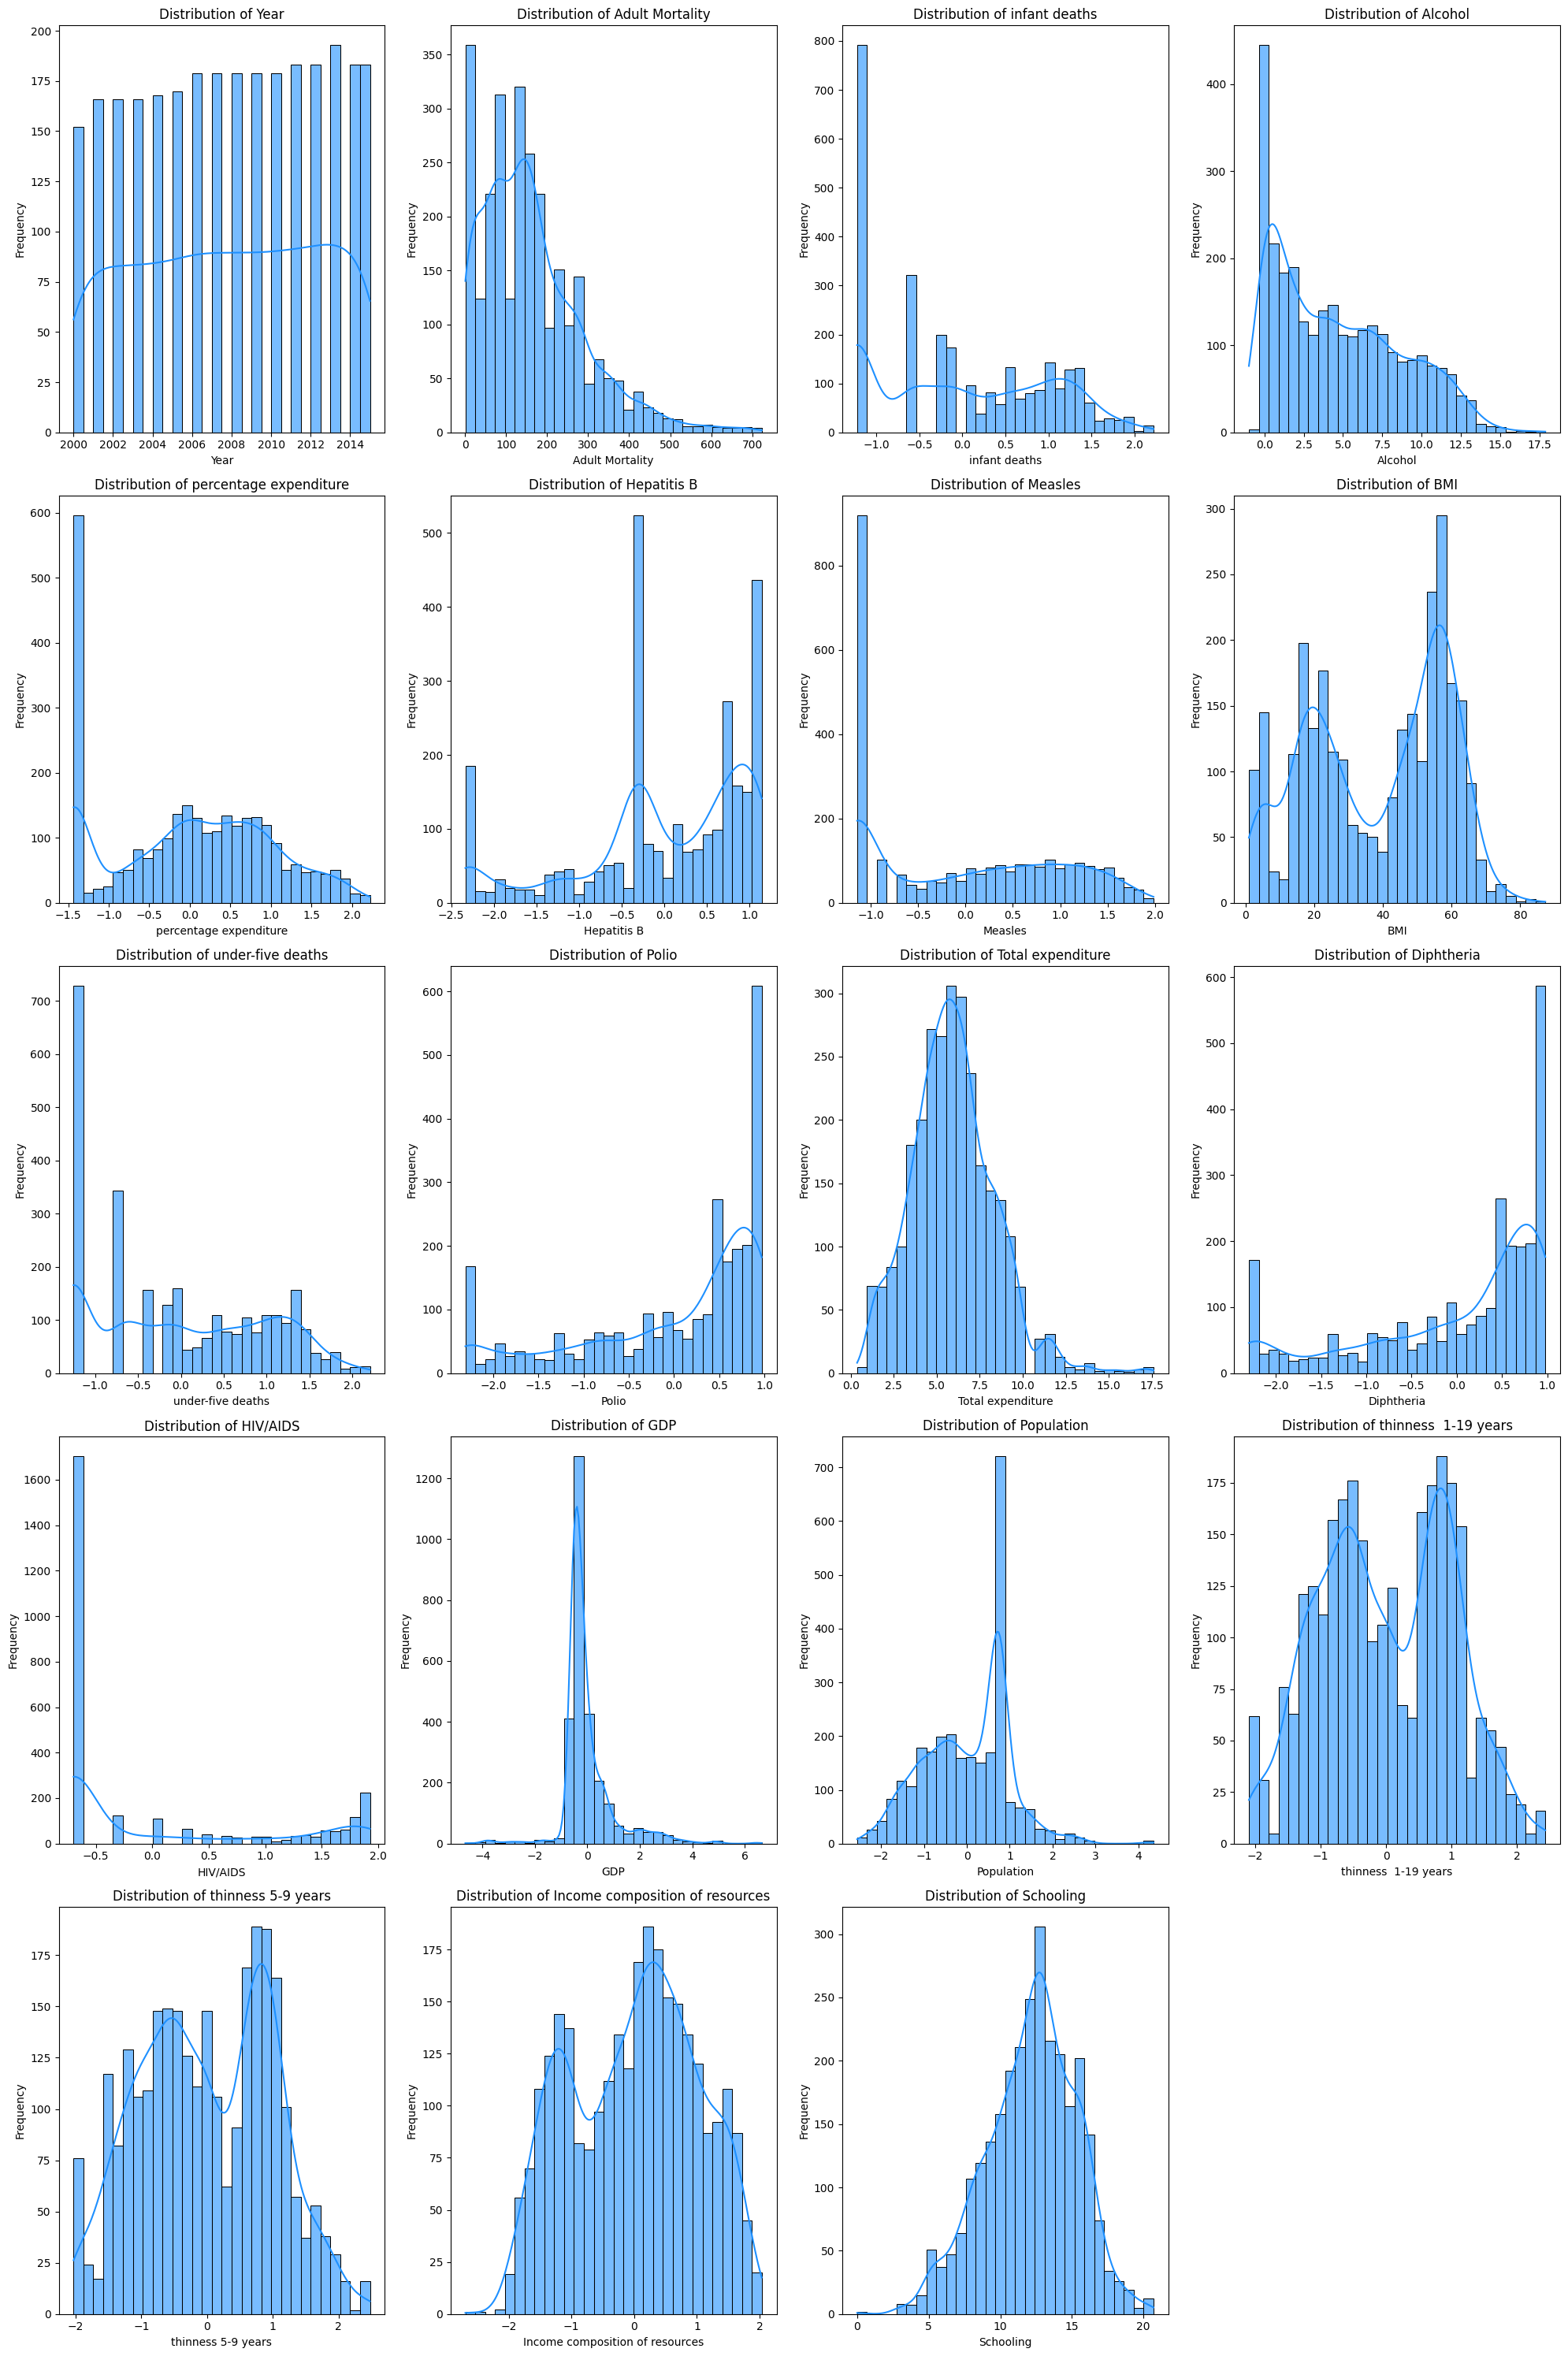

In [73]:
df = df_transformed

plt.figure(figsize=(20, 30))
for i, column in enumerate(numerical_features.columns, 1):
    plt.subplot(5, 4, i)
    
    sns.histplot(data=df, x=column, kde=True, bins=30, color='dodgerblue', alpha=0.6)
    
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

#### Categorical Features

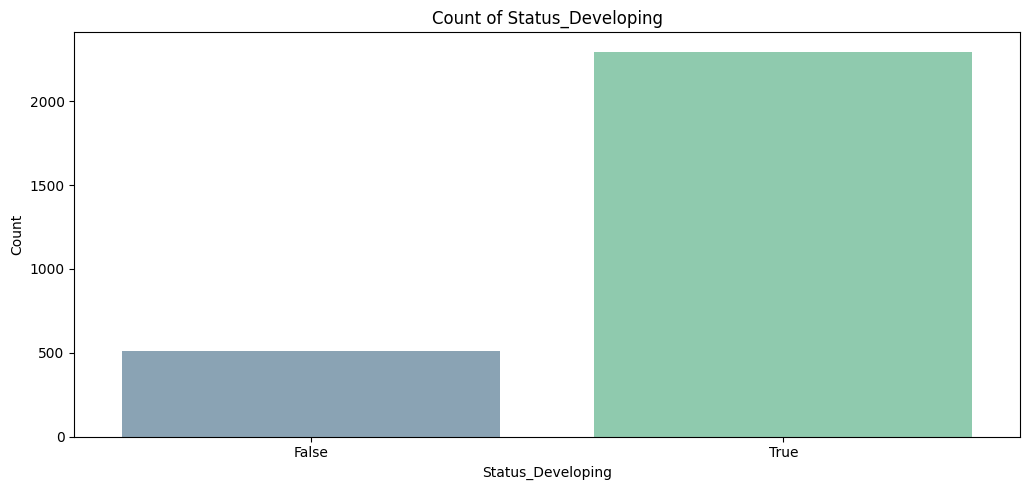

In [74]:
plt.figure(figsize=(20, 5))
for i, column in enumerate(categorical_features.columns, 1):
    plt.subplot(1, 2, i)
    
    sns.countplot(data=df, x=column, hue=column, palette='viridis', alpha=0.6, legend=False)
    
    plt.title(f'Count of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()

#### Target Variable

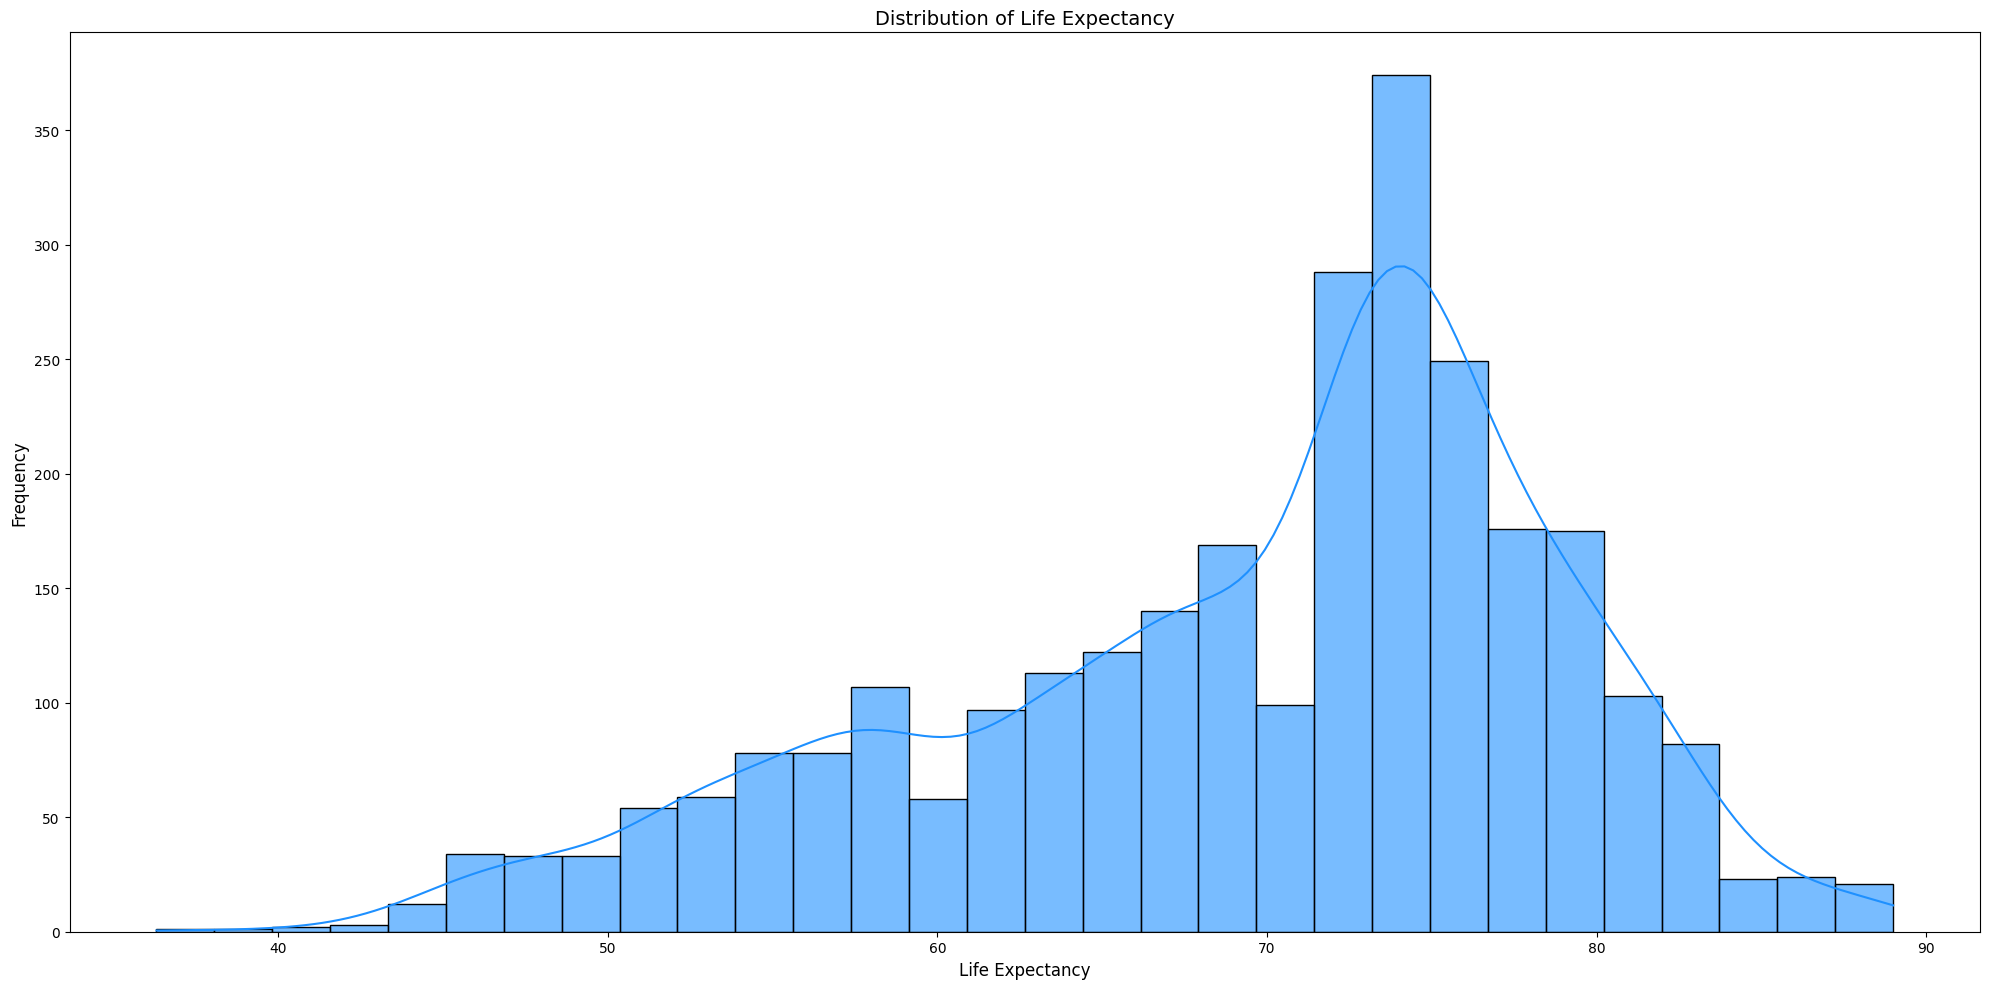

-0.663067308583726


In [75]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df, x='Life expectancy', kde=True, bins=30, color='dodgerblue', alpha=0.6)

plt.title('Distribution of Life Expectancy', fontsize=14)
plt.xlabel('Life Expectancy', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

print(df['Life expectancy'].skew())

### Relation of features

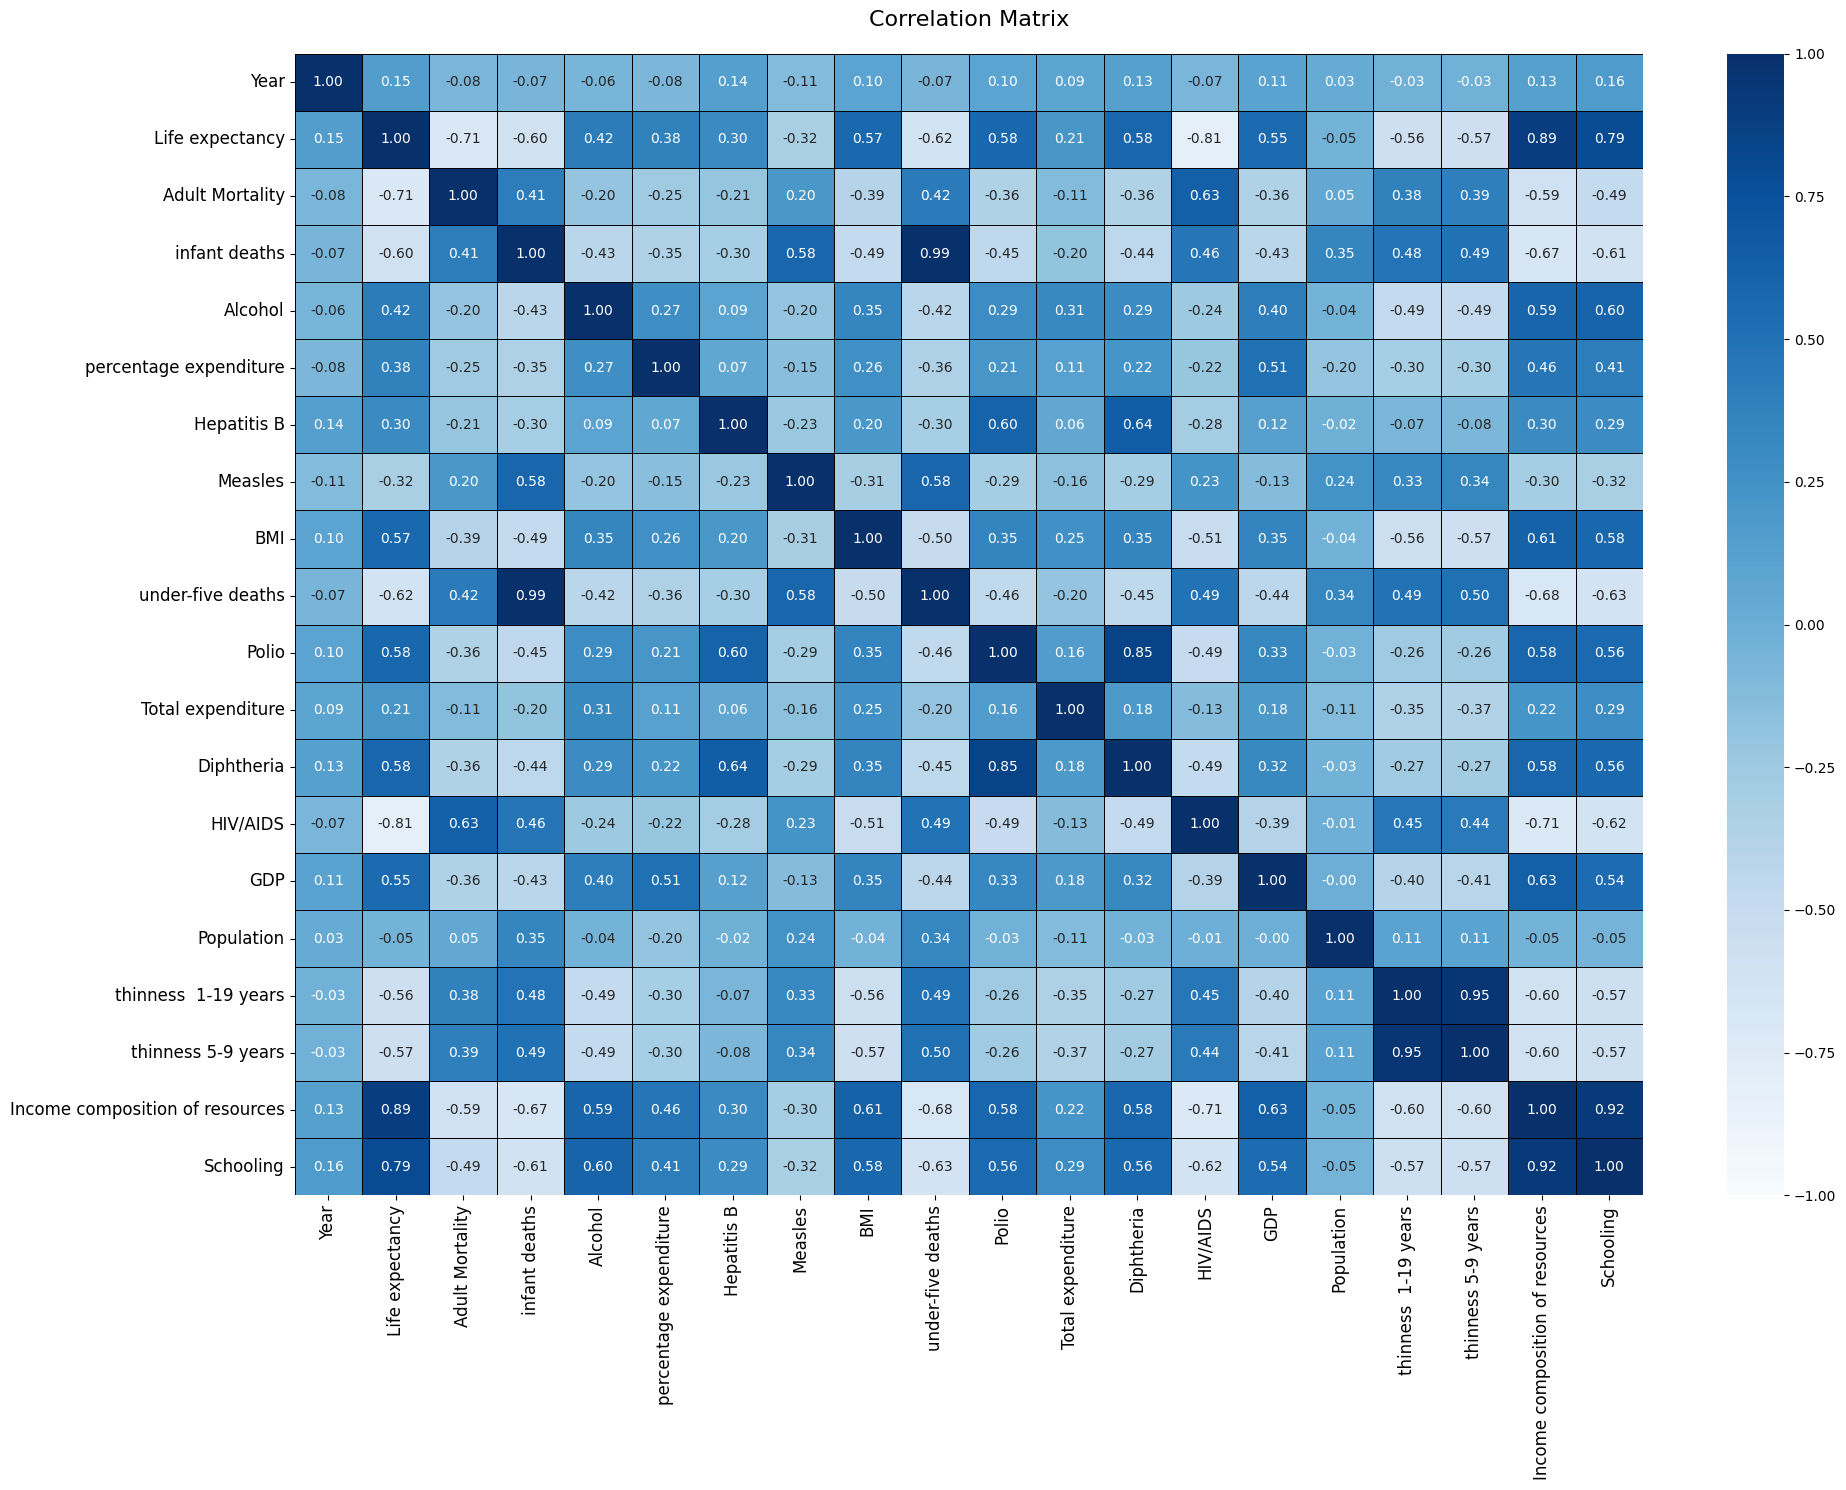

In [76]:
corr_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(20, 15))

sns.heatmap(
    corr_matrix, 
    annot=True,
    fmt=".2f",
    cmap='Blues',
    vmin=-1,
    vmax=1,
    linewidths=0.7,
    linecolor='black'
)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Matrix', fontsize=16, pad=20)

plt.tight_layout()
plt.show()

We reduce redundancy in the dataset by removing highly correlated features while retaining those with stronger relationships to the target variable.

In [77]:
# List of features to drop based on correlation analysis

features_to_remove = [
    'percentage expenditure',  # Retain GDP
    'infant deaths',           # Retain Under-five deaths
    'Schooling',               # Retain Income composition of resources
    'thinness 5-9 years'       # Retain thinness 1-19 years
]

df = df.drop(columns=features_to_remove)

### Feature Scaling and Final Data Preparation

The dataset includes a timestamp parameter (year), which introduces temporal dependencies. To ensure proper model training and evaluation, we need to:

1. Handle the temporal nature of the data.

2. Avoid data leakage by splitting the data chronologically.

In [78]:
from sklearn.model_selection import train_test_split

# Define time-based splits
df = df.sort_values(by='Year')

train_size = int(0.9 * len(df))

# Split the data into train and test
train = df.iloc[:train_size]
test = df.iloc[train_size:]

train = train.drop(columns=['Year'])
test = test.drop(columns=['Year'])

# Separate features and target
X_train, y_train = train.drop(columns=["Life expectancy"]), train["Life expectancy"]
X_test, y_test = test.drop(columns=["Life expectancy"]), test["Life expectancy"]

print(X_train.shape)
print(X_test.shape)

(2527, 15)
(281, 15)


In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training and Evaluation

The goal of this process is to tune hyperparameters of machine learning models in the context of time-series forecasting. Time-series data has a temporal order, and we need to respect this when splitting data into training and test sets. **TimeSeriesSplit** ensures that the training set always precedes the test set, which prevents data leakage.

**Grid search** helps us to systematically search through a predefined set of hyperparameters and select the best combination. By using GridSearchCV with TimeSeriesSplit, we ensure that hyperparameter tuning respects the time-series structure of the data.

In [80]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb

# Define TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Define models and parameter grids
models_and_params = {
    "SGDRegressor": (SGDRegressor(random_state=42),
            {'alpha': [0.0001, 0.001, 0.01], 'max_iter': [1000, 2000], 'tol': [1e-3, 1e-2]}),
    "SVM": (SVR(),
            {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1], 'kernel': ['linear', 'rbf', 'poly']}),
    "RandomForest": (RandomForestRegressor(random_state=42),
            {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15], 'min_samples_split': [3, 5, 10, 20]}),
    "AdaBoost": (AdaBoostRegressor(random_state=42),
            {'n_estimators': [50, 100, 200, 500, 1000], 'learning_rate': [0.01, 0.1, 1]}),
    "LightGBM": (LGBMRegressor(random_state=42, verbose=-1),
            {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [5, 10, 15], 'reg_lambda': [1, 1.25, 1.5]})
}

results = {}

for model_name, (model, param_grid) in models_and_params.items():
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=tscv,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Calculate metrics for training and test sets
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    
    # Store results
    results[model_name] = {
        'Train_MAE': train_mae, 'Train_MSE': train_mse, 'Train_RMSE': train_rmse,
        'Test_MAE': test_mae, 'Test_MSE': test_mse, 'Test_RMSE': test_rmse
    }

results_df = pd.DataFrame(results).T

# Identify the best model based on Test RMSE
best_model_name = results_df['Test_RMSE'].idxmin()
best_model_metrics = results_df.loc[best_model_name]

print("Best Model:", best_model_name)
print("Best Model Metrics:")
print(best_model_metrics)


Best Model: LightGBM
Best Model Metrics:
Train_MAE     0.416472
Train_MSE     0.392140
Train_RMSE    0.626211
Test_MAE      1.384751
Test_MSE      3.753609
Test_RMSE     1.937423
Name: LightGBM, dtype: float64


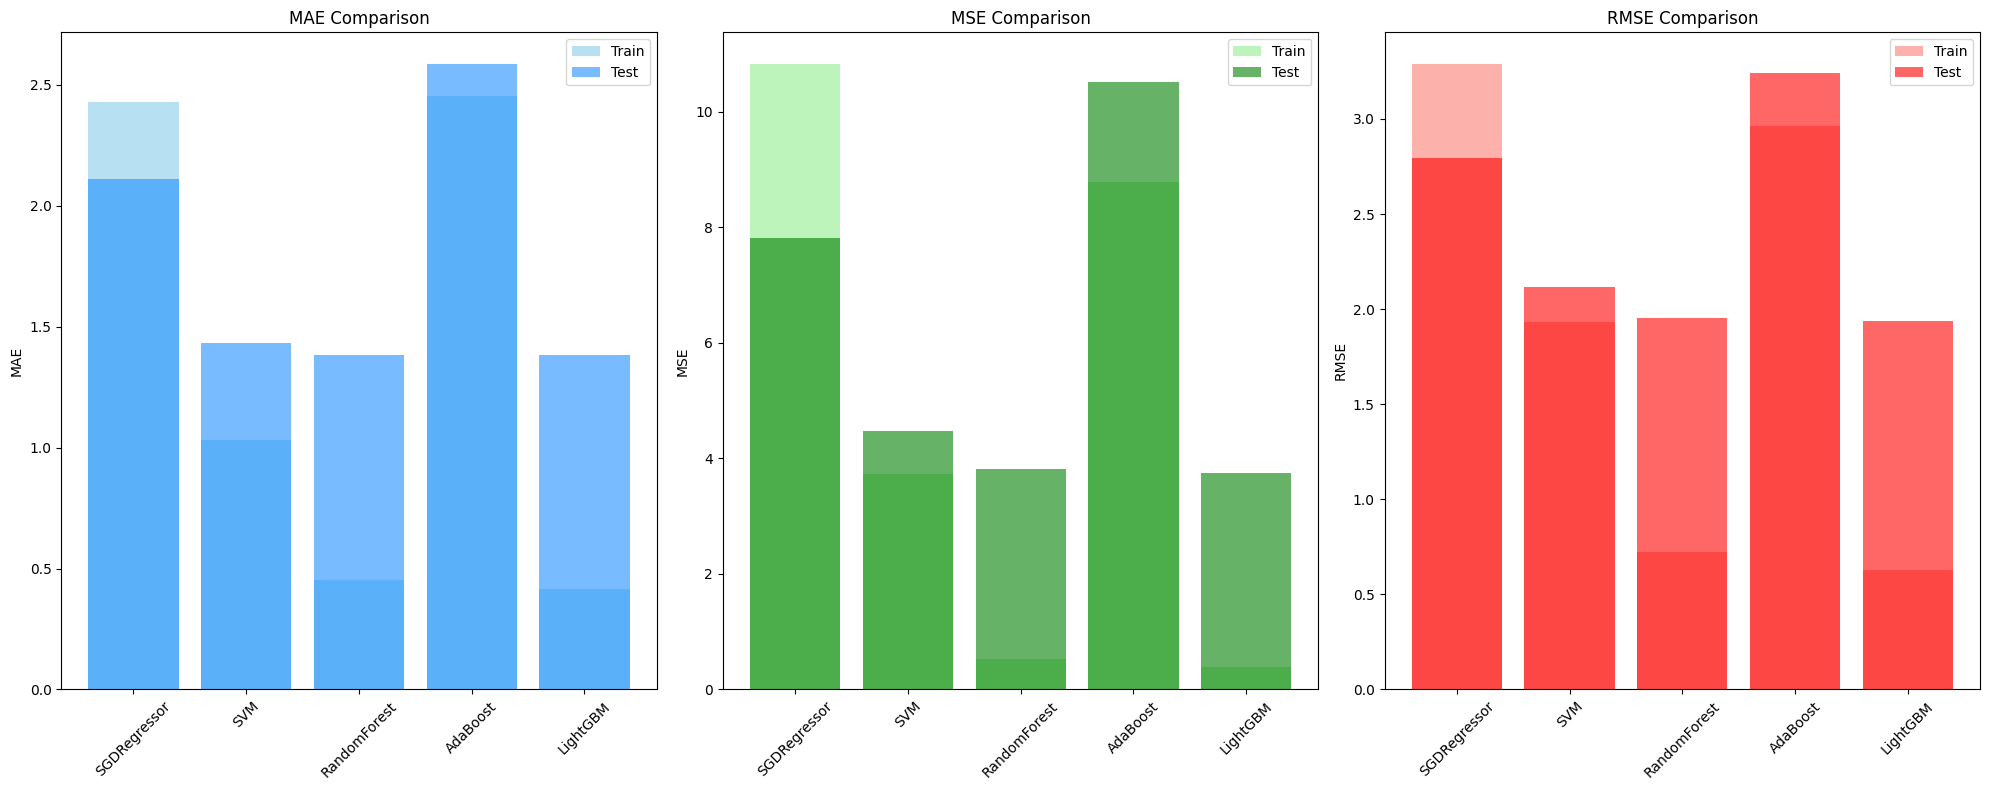

In [81]:
# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
metrics = ['MAE', 'MSE', 'RMSE']
colors_train = ['skyblue', 'lightgreen', 'salmon']
colors_test = ['dodgerblue', 'green', 'red']

for i, metric in enumerate(metrics):
    train_metric = f"Train_{metric}"
    test_metric = f"Test_{metric}"
    
    axes[i].bar(results_df.index, results_df[train_metric], color=colors_train[i], alpha=0.6, label='Train')
    axes[i].bar(results_df.index, results_df[test_metric], color=colors_test[i], alpha=0.6, label='Test')
    axes[i].set_title(f"{metric} Comparison")
    axes[i].set_ylabel(metric)
    axes[i].set_xticks(range(len(results_df.index)))
    axes[i].set_xticklabels(results_df.index, rotation=45)
    axes[i].legend()

plt.tight_layout()
plt.show()

# Conclusion

The goal of this project was to develop a predictive model for life expectancy using various socio-economic and health-related features. After thorough data preprocessing, feature selection, and model experimentation, we identified the LightGBM (Gradient Boosting Machine) as the best-performing model based on its evaluation metrics:

- Mean Absolute Error (MAE): **1.38**
- Mean Squared Error (MSE): **3.75**
- Root Mean Squared Error (RMSE): **1.93**

These metrics indicate the model's ability to make accurate predictions of life expectancy, with minimal average error and low variance.